In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.metrics import accuracy_score, f1_score

In [2]:
final_data = pd.DataFrame()
counts = []
for path in Path("/content/dataset").iterdir():
    if path.suffix ==".csv" and path.name!="train.csv":
        exp_data = pd.read_csv(str(path))
        counts.append(len(exp_data))
        final_data = pd.concat([final_data, exp_data])
final_data.shape

(25286, 48)

In [3]:
train = pd.read_csv("/content/dataset/train.csv")
#train.drop(["machining_finalized", "passed_visual_inspection", "material"], axis=1, inplace=True)
train

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,wax,6,4.0,unworn,yes,yes
1,2,wax,20,4.0,unworn,yes,yes
2,3,wax,6,3.0,unworn,yes,yes
3,4,wax,6,2.5,unworn,no,NaN
4,5,wax,20,3.0,unworn,no,NaN
5,6,wax,6,4.0,worn,yes,no
6,7,wax,20,4.0,worn,no,NaN
7,8,wax,20,4.0,worn,yes,no
8,9,wax,15,4.0,worn,yes,no
9,10,wax,12,4.0,worn,yes,no


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
for col in ["feedrate","clamp_pressure","tool_condition", "machining_finalized", "passed_visual_inspection"]:
    column = []
    for i in range(18):
        column.extend([train[col][i]]*(counts[i]))
    final_data[col] = column
#final_data.loc[:,["tool_condition", "machining_finalized", "passed_visual_inspection"]] =
#a = pd.get_dummies(final_data.loc[:,["tool_condition", "machining_finalized", "passed_visual_inspection"]], drop_first=True)

final_data["tool_condition"] = np.where(final_data["tool_condition"]=="worn", 1, 0)
final_data["machining_finalized"] = np.where(final_data["machining_finalized"]=="yes", 1, 0)
final_data["passed_visual_inspection"] = np.where(final_data["passed_visual_inspection"]=="yes", 1, 0)
final_data["tool_condition"] = le.fit_transform(final_data["tool_condition"])
final_data["machining_finalized"] = le.fit_transform(final_data["machining_finalized"])
final_data["passed_visual_inspection"] = le.fit_transform(final_data["passed_visual_inspection"])
final_data["Machining_Process"] = le.fit_transform(final_data["Machining_Process"])
final_data.drop(["passed_visual_inspection", "machining_finalized"],axis=1, inplace=True)
final_data

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,feedrate,clamp_pressure,tool_condition
0,146.0,12.10,106.0,146.0,12.00,0.00,5.78,0.1100,324.0,20.70,...,118.0,0.159,12.0,1.0,2.0,12.0,7,6,4.0,0
1,147.0,11.90,-100.0,147.0,12.00,0.00,6.37,0.0994,324.0,22.30,...,117.0,0.208,12.0,1.0,70.0,12.0,7,6,4.0,0
2,148.0,12.30,100.0,148.0,12.00,0.00,3.53,0.0864,324.0,21.10,...,112.0,0.164,12.0,1.0,70.0,12.0,7,6,4.0,0
3,149.0,11.90,-81.2,149.0,12.00,0.00,6.85,0.1050,324.0,21.70,...,117.0,0.176,12.0,1.0,70.0,12.0,7,6,4.0,0
4,151.0,11.70,-150.0,151.0,12.00,0.00,9.12,0.1210,324.0,20.70,...,121.0,0.175,12.0,1.0,70.0,12.0,7,6,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,143.0,-5.72,-12.5,143.0,-5.78,3.64,-4.80,0.1010,324.0,13.90,...,116.0,0.168,12.0,1.0,87.0,6.0,0,3,2.5,1
1292,143.0,-5.35,18.8,143.0,-5.26,6.56,-5.64,0.0948,324.0,12.50,...,120.0,0.174,12.0,1.0,87.0,6.0,0,3,2.5,1
1293,142.0,-4.55,-12.5,142.0,-4.47,9.13,-5.73,0.1040,324.0,10.50,...,123.0,0.170,12.0,1.0,87.0,6.0,0,3,2.5,1
1294,142.0,-3.55,-25.0,142.0,-3.44,11.20,-5.69,0.1010,324.0,10.10,...,115.0,0.196,12.0,1.0,87.0,6.0,0,3,2.5,1


50 50


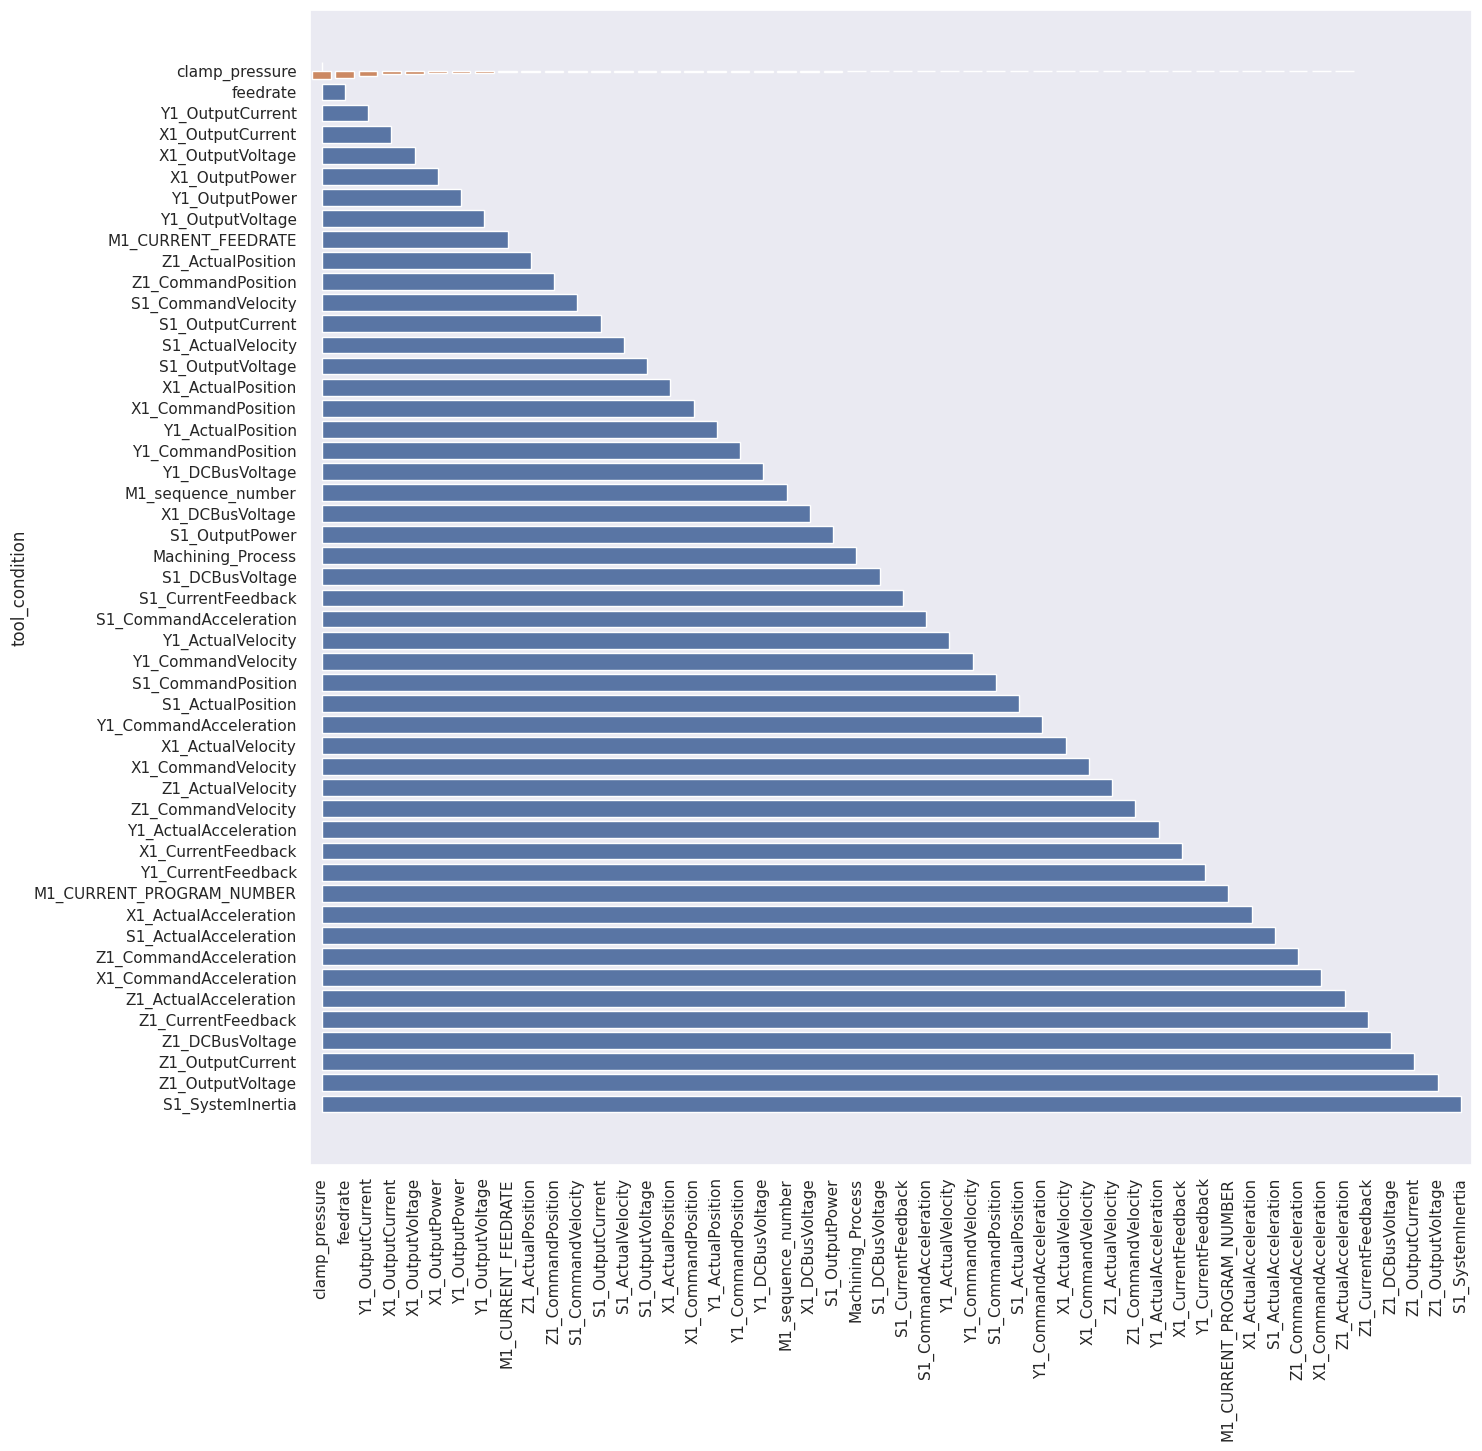

In [6]:

sns.set()
fig, ax = plt.subplots(figsize=(15,15))
a = final_data.corr()
a = abs(a)
a.sort_values(by = ["tool_condition"], ascending=False, inplace=True)
x = a["tool_condition"][1:]
y = a.index[1:]
print(len(x), len(y))
sns.set()
sns.barplot(y)
sns.barplot(x)
ax.tick_params(axis = "x", rotation = 90)

In [7]:
# Since our target label is tool condition, correlation of the target variable with the features was found and the features whose absolute correlation values greater than 0.05 were selected for further analysis.

In [8]:
corr_cols = a.index[:23]
corr_cols
corr_data = final_data.loc[:,corr_cols]
corr_data.reset_index(inplace=True, drop=True)
corr_data

,tool_condition,clamp_pressure,feedrate,Y1_OutputCurrent,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_OutputPower,Y1_OutputVoltage,M1_CURRENT_FEEDRATE,...,S1_OutputCurrent,S1_ActualVelocity,S1_OutputVoltage,X1_ActualPosition,X1_CommandPosition,Y1_ActualPosition,Y1_CommandPosition,Y1_DCBusVoltage,M1_sequence_number,X1_DCBusVoltage
0,0,4.0,6,323.0,324.0,20.70,0.002800,2.710000e-07,3.650,12.0,...,321.0,53.3,118.0,146.0,146.0,105.0,105.0,0.0253,2.0,0.1100
1,0,4.0,6,323.0,324.0,22.30,0.002450,-7.550000e-08,0.575,12.0,...,321.0,53.3,117.0,147.0,147.0,105.0,105.0,0.0149,70.0,0.0994
2,0,4.0,6,323.0,324.0,21.10,0.002140,0.000000e+00,2.280,12.0,...,321.0,53.4,112.0,148.0,148.0,105.0,105.0,0.0222,70.0,0.0864
3,0,4.0,6,323.0,324.0,21.70,0.002590,0.000000e+00,3.880,12.0,...,321.0,53.3,117.0,149.0,149.0,105.0,105.0,0.0307,70.0,0.1050
4,0,4.0,6,323.0,324.0,20.70,0.002970,4.670000e-07,0.871,12.0,...,317.0,53.2,121.0,151.0,151.0,105.0,105.0,0.0176,70.0,0.1210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25281,1,2.5,3,323.0,324.0,13.90,0.001240,2.970000e-04,8.390,6.0,...,315.0,53.3,116.0,143.0,143.0,72.4,72.5,0.0880,87.0,0.1010
25282,1,2.5,3,323.0,324.0,12.50,0.001070,8.890000e-04,12.800,6.0,...,315.0,53.3,120.0,143.0,143.0,72.7,72.7,0.1540,87.0,0.0948
25283,1,2.5,3,323.0,324.0,10.50,0.001000,9.870000e-04,11.000,6.0,...,313.0,53.3,123.0,142.0,142.0,73.0,73.0,0.1140,87.0,0.1040
25284,1,2.5,3,323.0,324.0,10.10,0.000769,7.790000e-04,11.100,6.0,...,315.0,53.3,115.0,142.0,142.0,73.5,73.5,0.0744,87.0,0.1010


Text(0, 0.5, 'tool_condition')

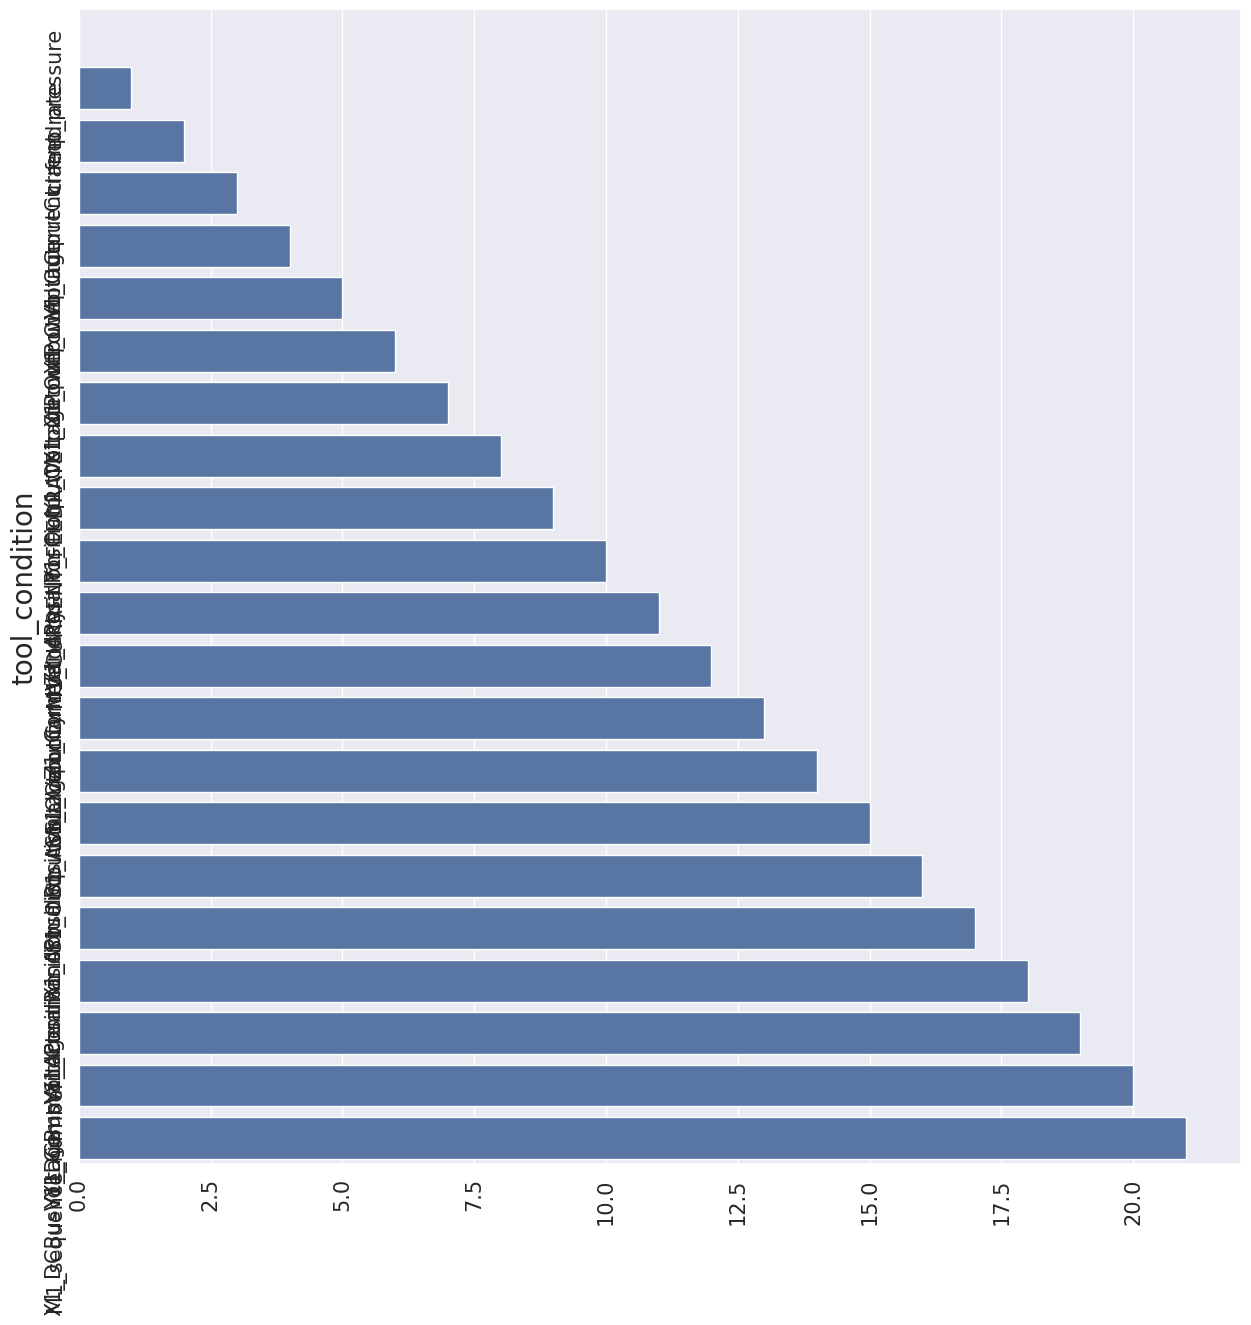

In [9]:
fig, ax = plt.subplots(figsize=(15,15))
a = final_data.corr()
a = abs(a)
a.sort_values(by = ["tool_condition"], ascending=False, inplace=True)
x = a["tool_condition"][1:23]
y = a.index[1:23]
#print(len(x), len(y))
sns.set()
sns.barplot(y)
ax.tick_params(axis="x", rotation = 90, labelsize=15)
ax.tick_params(axis="y", rotation = 90, labelsize=15)
ax.set_ylabel("tool_condition",fontsize=20)

<Axes: ylabel='tool_condition'>

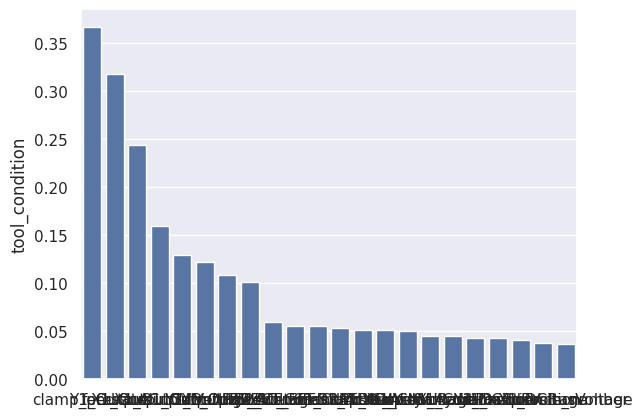

In [10]:
sns.barplot(x)

In [11]:
sns.barplot(ax=ax)

<Axes: ylabel='tool_condition'>

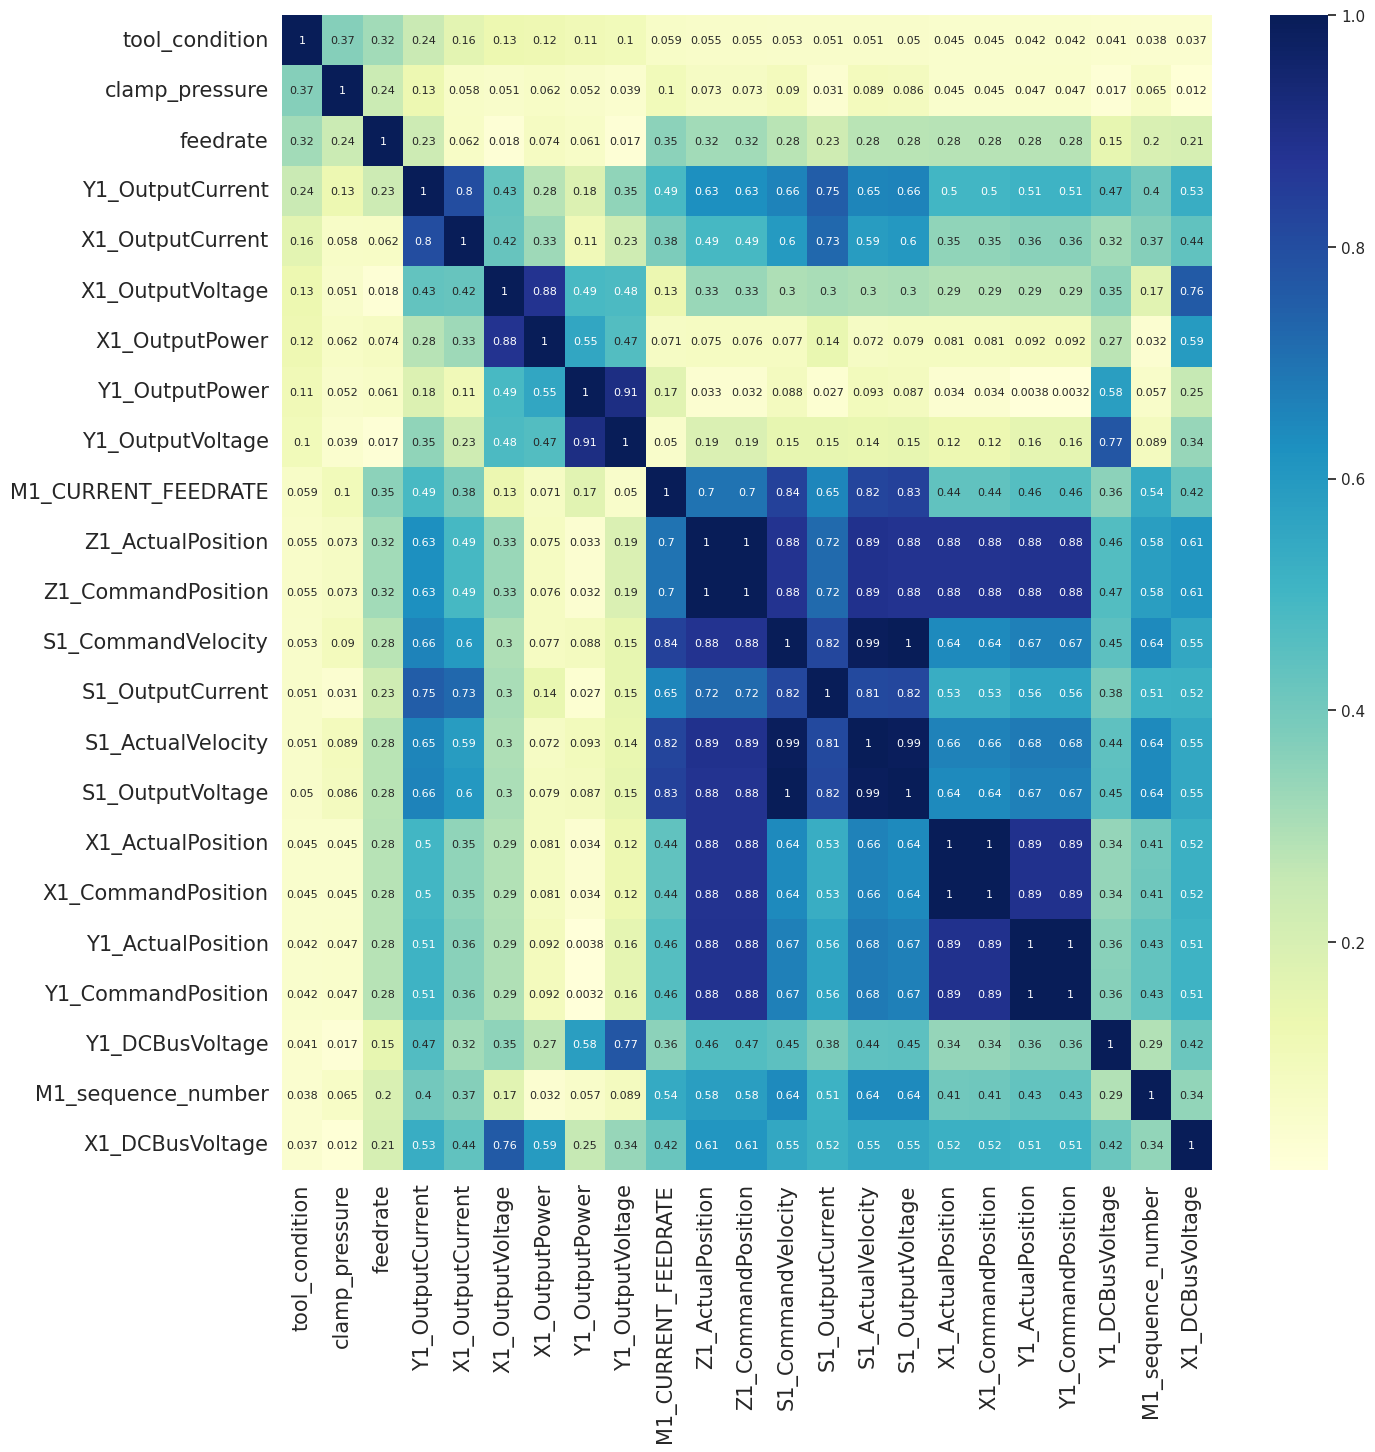

In [12]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(abs(corr_data.corr()), annot=True, annot_kws={"size": 8}, cmap = "YlGnBu")
plt.tick_params(axis="x", rotation = 90, labelsize=15)
plt.tick_params(axis="y", labelsize=15)

In [13]:
# Heatmap for those 25 variables was drawn. From this figure, it is evident that there are some highly correlated features which can decrease the performance and provide weak generalization of the model. In order to avoid this, those highly correlated features were removed for further analysis.

Text(0, 0.5, 'Cummulative summation')

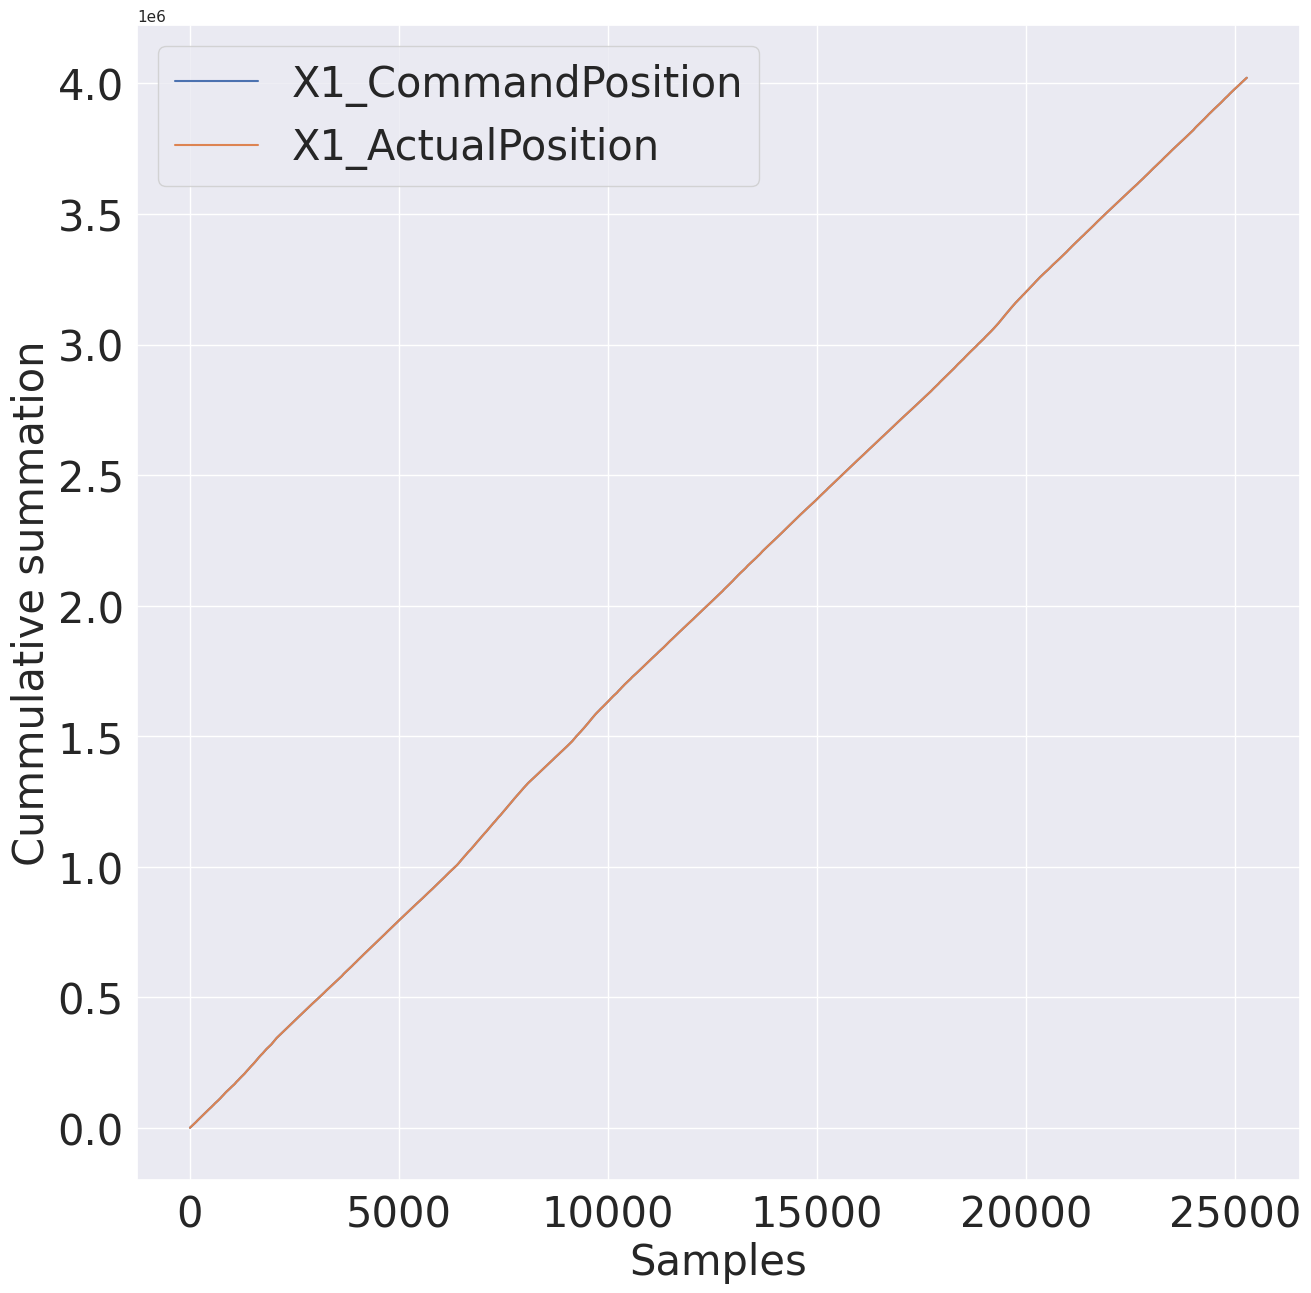

In [14]:
fig = plt.figure(figsize=(15,15))
plt.plot(corr_data["X1_CommandPosition"].cumsum(), label="X1_CommandPosition")
plt.plot(corr_data["X1_ActualPosition"].cumsum(), label="X1_ActualPosition")
plt.legend(loc="best", fontsize=30)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.xlabel("Samples", fontsize=30)
plt.ylabel("Cummulative summation", fontsize=30)

Text(0, 0.5, 'Cummulative summation')

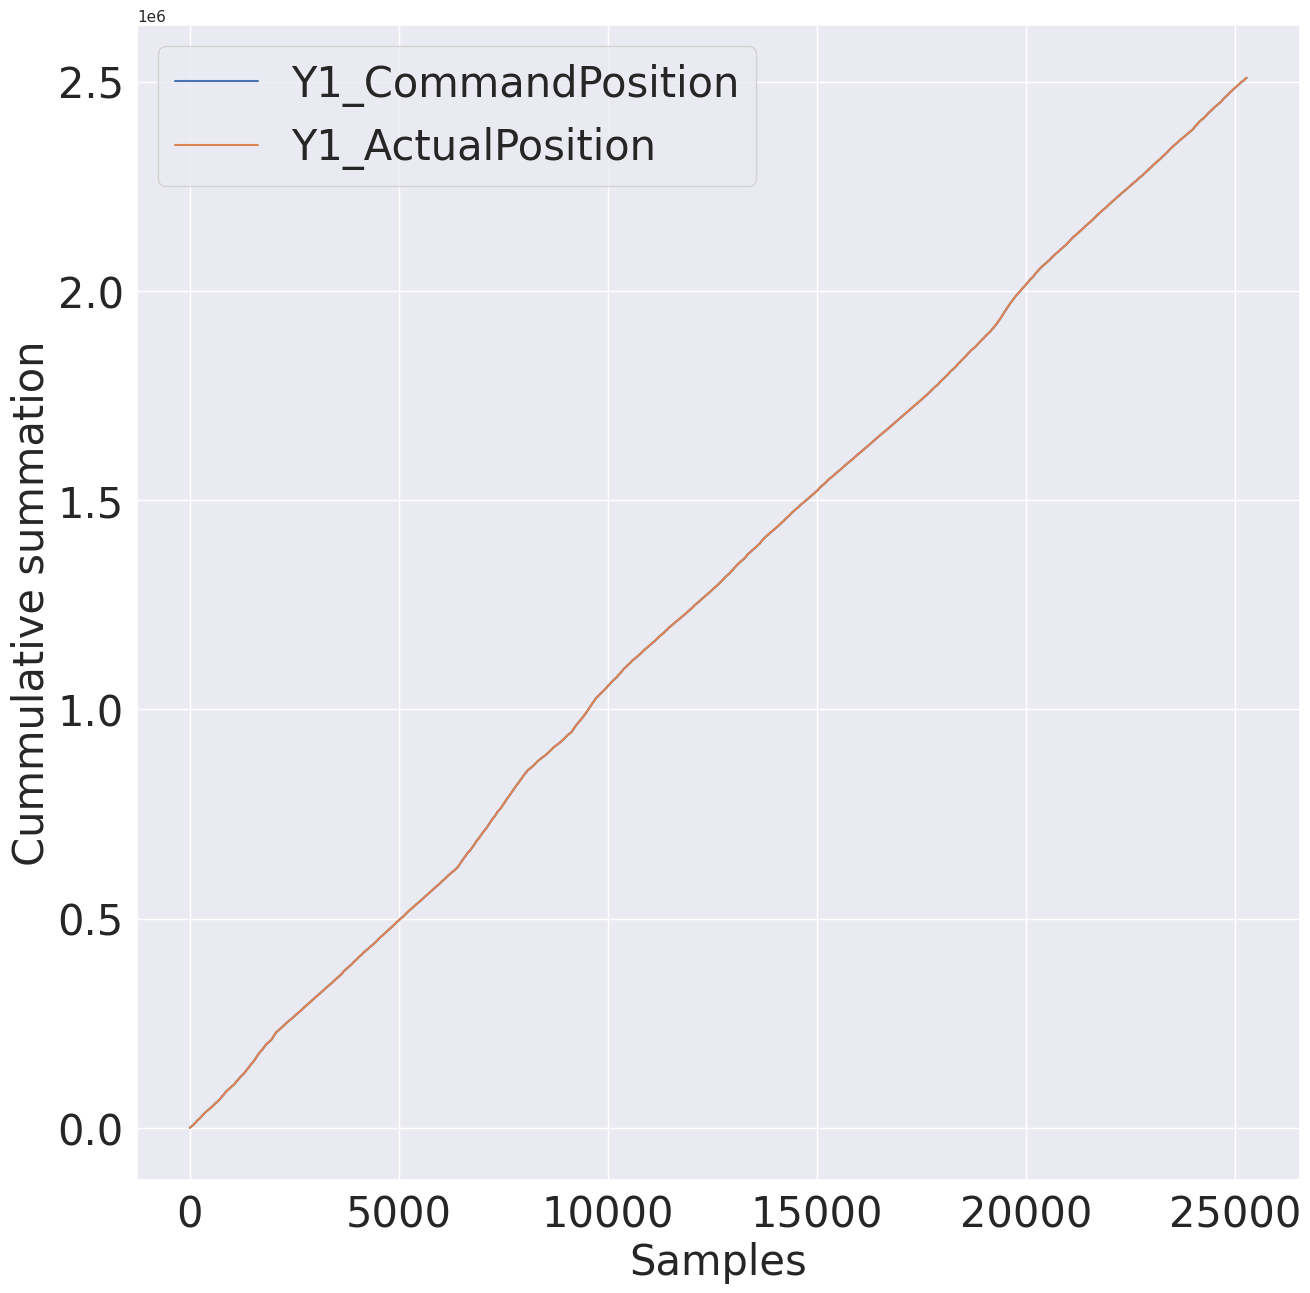

In [15]:
fig = plt.figure(figsize=(15,15))
plt.plot(corr_data["Y1_CommandPosition"].cumsum(), label="Y1_CommandPosition")
plt.plot(corr_data["Y1_ActualPosition"].cumsum(), label="Y1_ActualPosition")
plt.legend(loc="best", fontsize=30)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.xlabel("Samples", fontsize=30)
plt.ylabel("Cummulative summation", fontsize=30)

Text(0, 0.5, 'Cummulative summation')

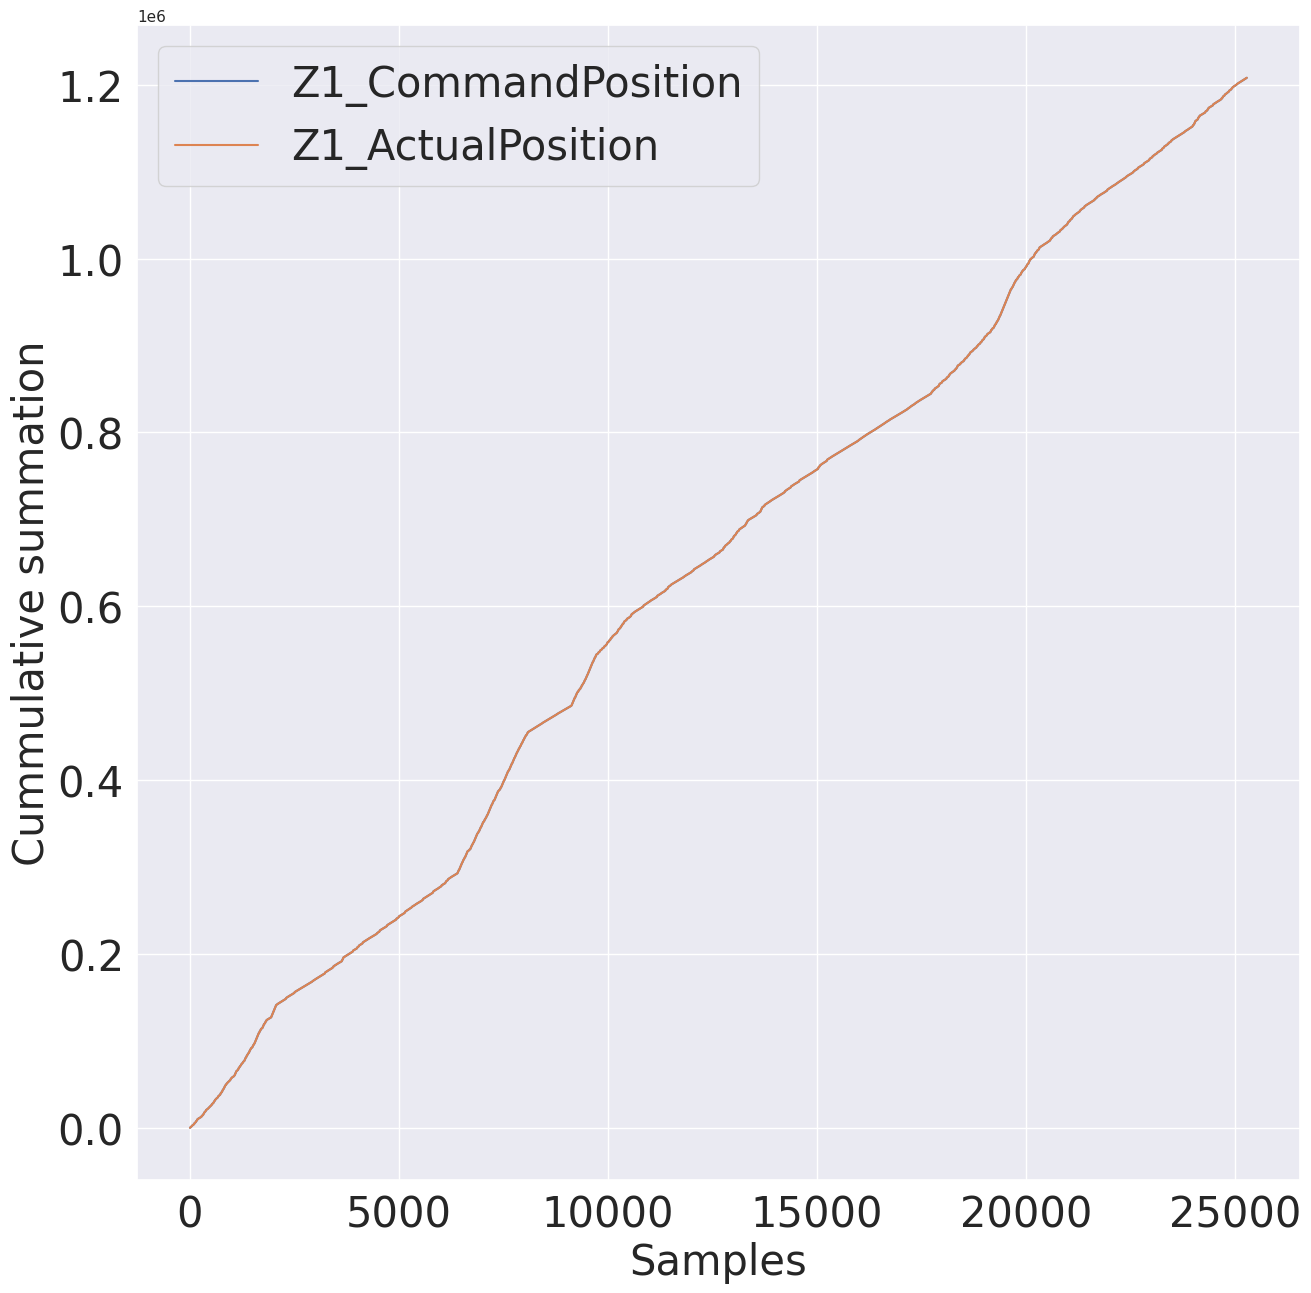

In [16]:
fig = plt.figure(figsize=(15,15))
plt.plot(corr_data["Z1_CommandPosition"].cumsum(), label="Z1_CommandPosition")
plt.plot(corr_data["Z1_ActualPosition"].cumsum(), label="Z1_ActualPosition")
plt.legend(loc="best", fontsize=30)
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.xlabel("Samples", fontsize=30)
plt.ylabel("Cummulative summation", fontsize=30)

<Axes: ylabel='count'>

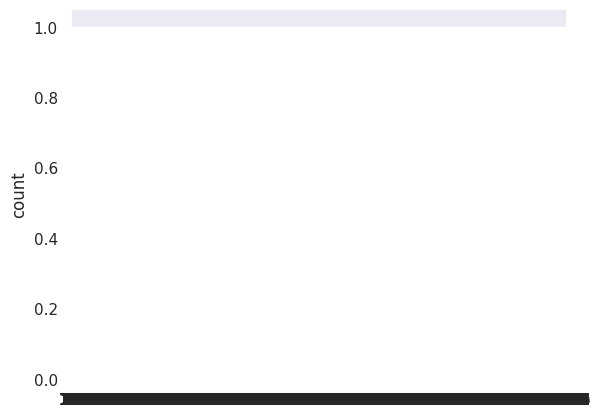

In [ ]:
sns.countplot(corr_data["tool_condition"])

In [17]:
cleaned_corr_data = corr_data.drop(["X1_CommandPosition", "Y1_CommandPosition", "Z1_CommandPosition"], axis=1)
cleaned_corr_data

,tool_condition,clamp_pressure,feedrate,Y1_OutputCurrent,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_OutputPower,Y1_OutputVoltage,M1_CURRENT_FEEDRATE,Z1_ActualPosition,S1_CommandVelocity,S1_OutputCurrent,S1_ActualVelocity,S1_OutputVoltage,X1_ActualPosition,Y1_ActualPosition,Y1_DCBusVoltage,M1_sequence_number,X1_DCBusVoltage
0,0,4.0,6,323.0,324.0,20.70,0.002800,2.710000e-07,3.650,12.0,28.7,53.3,321.0,53.3,118.0,146.0,105.0,0.0253,2.0,0.1100
1,0,4.0,6,323.0,324.0,22.30,0.002450,-7.550000e-08,0.575,12.0,28.7,53.3,321.0,53.3,117.0,147.0,105.0,0.0149,70.0,0.0994
2,0,4.0,6,323.0,324.0,21.10,0.002140,0.000000e+00,2.280,12.0,28.7,53.3,321.0,53.4,112.0,148.0,105.0,0.0222,70.0,0.0864
3,0,4.0,6,323.0,324.0,21.70,0.002590,0.000000e+00,3.880,12.0,28.7,53.3,321.0,53.3,117.0,149.0,105.0,0.0307,70.0,0.1050
4,0,4.0,6,323.0,324.0,20.70,0.002970,4.670000e-07,0.871,12.0,28.7,53.3,317.0,53.2,121.0,151.0,105.0,0.0176,70.0,0.1210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25281,1,2.5,3,323.0,324.0,13.90,0.001240,2.970000e-04,8.390,6.0,28.7,53.3,315.0,53.3,116.0,143.0,72.4,0.0880,87.0,0.1010
25282,1,2.5,3,323.0,324.0,12.50,0.001070,8.890000e-04,12.800,6.0,28.7,53.3,315.0,53.3,120.0,143.0,72.7,0.1540,87.0,0.0948
25283,1,2.5,3,323.0,324.0,10.50,0.001000,9.870000e-04,11.000,6.0,28.7,53.3,313.0,53.3,123.0,142.0,73.0,0.1140,87.0,0.1040
25284,1,2.5,3,323.0,324.0,10.10,0.000769,7.790000e-04,11.100,6.0,28.7,53.3,315.0,53.3,115.0,142.0,73.5,0.0744,87.0,0.1010


Text(0, 0.5, 'tool_condition')

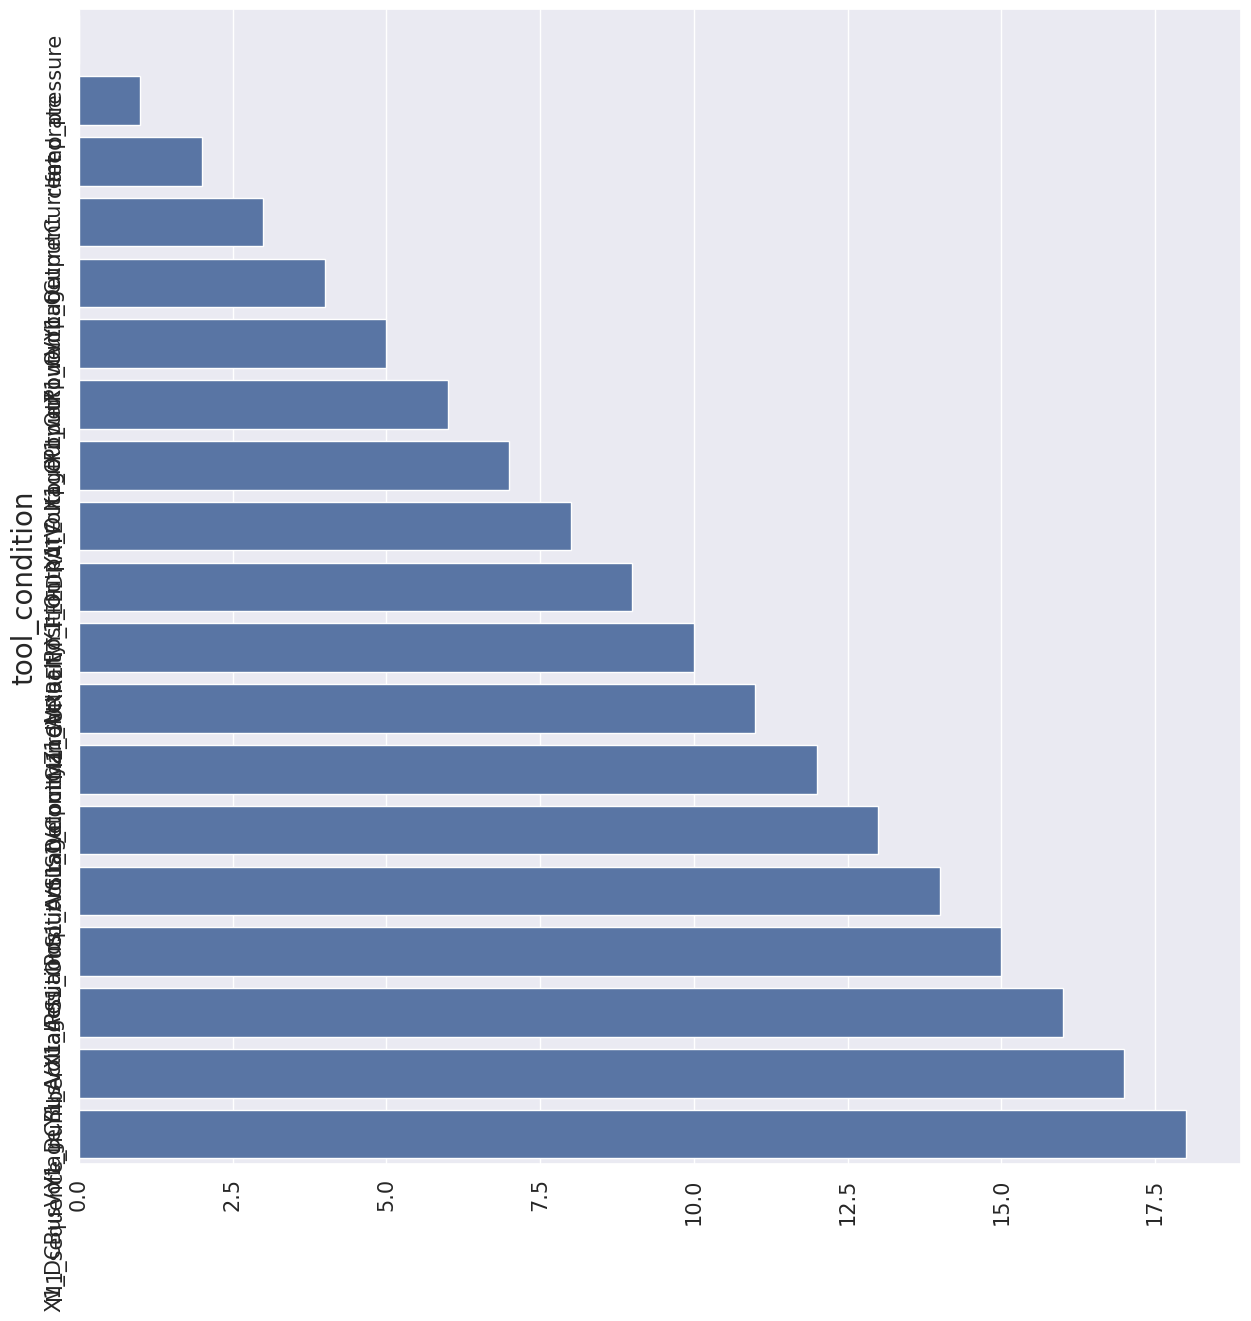

In [18]:
fig, ax = plt.subplots(figsize=(15,15))
a = cleaned_corr_data.corr()
a = abs(a)
a.sort_values(by = ["tool_condition"], ascending=False, inplace=True)
x = a["tool_condition"][1:]
y = a.index[1:]
#print(len(x), len(y))
sns.set()
sns.barplot(y)
ax.tick_params(axis="x", rotation = 90, labelsize=15)
ax.tick_params(axis="y", rotation = 90, labelsize=15)
ax.set_ylabel("tool_condition",fontsize=20)

<Axes: ylabel='count'>

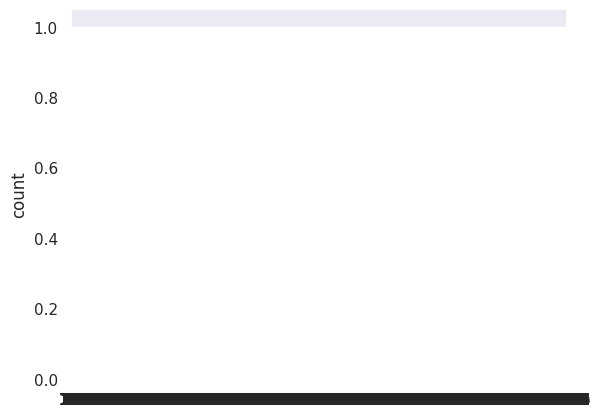

In [ ]:
sns.countplot(cleaned_corr_data["tool_condition"])

In [20]:
diff = sum(cleaned_corr_data["tool_condition"] == 1) - sum(cleaned_corr_data["tool_condition"] == 0)
zeros = cleaned_corr_data[cleaned_corr_data["tool_condition"] == 0]
extra_zeros = zeros.sample(n = abs(diff), replace = False)
cleaned_corr_data = pd.concat([cleaned_corr_data, extra_zeros], ignore_index = True)
cleaned_corr_data = cleaned_corr_data.sample(frac = 1, replace = False)
cleaned_corr_data.reset_index(drop = True, inplace = True)
cleaned_corr_data

,tool_condition,clamp_pressure,feedrate,Y1_OutputCurrent,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_OutputPower,Y1_OutputVoltage,M1_CURRENT_FEEDRATE,Z1_ActualPosition,S1_CommandVelocity,S1_OutputCurrent,S1_ActualVelocity,S1_OutputVoltage,X1_ActualPosition,Y1_ActualPosition,Y1_DCBusVoltage,M1_sequence_number,X1_DCBusVoltage
0,0,3.0,20,332.0,328.0,0.00,0.000000,-1.140000e-06,0.00,50.0,119.0,0.0,331.0,0.0,0.0,198.0,158.0,2.680000e-19,0.0,2.790000e-19
1,1,4.0,12,323.0,324.0,34.90,0.004650,-1.260000e-05,4.43,20.0,27.7,53.3,321.0,53.4,121.0,151.0,89.5,7.910000e-02,105.0,1.120000e-01
2,0,2.5,3,325.0,327.0,7.56,0.000101,7.480000e-04,11.20,3.0,29.7,53.3,324.0,53.4,117.0,142.0,91.4,1.200000e-01,25.0,7.200000e-02
3,0,2.5,3,326.0,327.0,7.45,0.000493,1.380000e-05,1.82,3.0,28.7,53.3,317.0,53.4,117.0,150.0,72.4,4.600000e-02,87.0,7.980000e-02
4,0,3.0,3,326.0,327.0,2.31,0.000000,7.000000e-07,2.31,3.0,31.9,53.3,324.0,53.3,121.0,151.0,73.0,1.880000e-02,54.0,2.390000e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29561,1,4.0,20,325.0,326.0,1.23,0.000005,6.680000e-03,32.30,20.0,29.7,53.3,322.0,53.4,117.0,162.0,102.0,1.630000e-01,30.0,3.530000e-02
29562,0,2.5,6,326.0,327.0,9.50,0.000232,-8.460000e-06,6.17,3.0,28.7,53.3,323.0,53.4,119.0,151.0,74.5,5.460000e-02,61.0,4.720000e-02
29563,0,3.0,20,332.0,328.0,0.00,0.000000,0.000000e+00,0.00,50.0,119.0,0.0,331.0,0.0,0.0,198.0,158.0,2.680000e-19,0.0,2.790000e-19
29564,0,3.0,3,326.0,327.0,9.74,0.000569,-2.320000e-05,7.45,3.0,27.5,53.3,324.0,53.3,117.0,158.0,91.6,7.340000e-02,122.0,9.760000e-02


In [ ]:
sns.countplot(cleaned_corr_data["tool_condition"])

In [21]:
cleaned_corr_data.columns

Index(['tool_condition', 'clamp_pressure', 'feedrate', 'Y1_OutputCurrent',
       'X1_OutputCurrent', 'X1_OutputVoltage', 'X1_OutputPower',
       'Y1_OutputPower', 'Y1_OutputVoltage', 'M1_CURRENT_FEEDRATE',
       'Z1_ActualPosition', 'S1_CommandVelocity', 'S1_OutputCurrent',
       'S1_ActualVelocity', 'S1_OutputVoltage', 'X1_ActualPosition',
       'Y1_ActualPosition', 'Y1_DCBusVoltage', 'M1_sequence_number',
       'X1_DCBusVoltage'],
      dtype='object')

In [22]:
cleaned_corr_data.head()

,tool_condition,clamp_pressure,feedrate,Y1_OutputCurrent,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_OutputPower,Y1_OutputVoltage,M1_CURRENT_FEEDRATE,Z1_ActualPosition,S1_CommandVelocity,S1_OutputCurrent,S1_ActualVelocity,S1_OutputVoltage,X1_ActualPosition,Y1_ActualPosition,Y1_DCBusVoltage,M1_sequence_number,X1_DCBusVoltage
0,0,3.0,20,332.0,328.0,0.00,0.000000,-1.140000e-06,0.00,50.0,119.0,0.0,331.0,0.0,0.0,198.0,158.0,2.680000e-19,0.0,2.790000e-19
1,1,4.0,12,323.0,324.0,34.90,0.004650,-1.260000e-05,4.43,20.0,27.7,53.3,321.0,53.4,121.0,151.0,89.5,7.910000e-02,105.0,1.120000e-01
2,0,2.5,3,325.0,327.0,7.56,0.000101,7.480000e-04,11.20,3.0,29.7,53.3,324.0,53.4,117.0,142.0,91.4,1.200000e-01,25.0,7.200000e-02
3,0,2.5,3,326.0,327.0,7.45,0.000493,1.380000e-05,1.82,3.0,28.7,53.3,317.0,53.4,117.0,150.0,72.4,4.600000e-02,87.0,7.980000e-02
4,0,3.0,3,326.0,327.0,2.31,0.000000,7.000000e-07,2.31,3.0,31.9,53.3,324.0,53.3,121.0,151.0,73.0,1.880000e-02,54.0,2.390000e-02


In [23]:
!pip install pytorch_tabular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.4/891.4 kB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.8 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144555 sha256=f29f884eb8a3776a625b51884c274f7cd66503575afabf9ebb0044d1b07355db
  Stored in directory: /root/.cache/pip/wheels/1a/97/32/461f837398029ad76911109f07047fde1d7b661a147c7c56d1
Successfully built antlr4-python

In [24]:
from pytorch_tabular import TabularModel
from pytorch_tabular.models import NodeConfig,CategoryEmbeddingModelConfig
from pytorch_tabular.config import (
    DataConfig,
    OptimizerConfig,
    TrainerConfig,
)


In [25]:
cleaned_corr_data.head()

,tool_condition,clamp_pressure,feedrate,Y1_OutputCurrent,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_OutputPower,Y1_OutputVoltage,M1_CURRENT_FEEDRATE,Z1_ActualPosition,S1_CommandVelocity,S1_OutputCurrent,S1_ActualVelocity,S1_OutputVoltage,X1_ActualPosition,Y1_ActualPosition,Y1_DCBusVoltage,M1_sequence_number,X1_DCBusVoltage
0,0,3.0,20,332.0,328.0,0.00,0.000000,-1.140000e-06,0.00,50.0,119.0,0.0,331.0,0.0,0.0,198.0,158.0,2.680000e-19,0.0,2.790000e-19
1,1,4.0,12,323.0,324.0,34.90,0.004650,-1.260000e-05,4.43,20.0,27.7,53.3,321.0,53.4,121.0,151.0,89.5,7.910000e-02,105.0,1.120000e-01
2,0,2.5,3,325.0,327.0,7.56,0.000101,7.480000e-04,11.20,3.0,29.7,53.3,324.0,53.4,117.0,142.0,91.4,1.200000e-01,25.0,7.200000e-02
3,0,2.5,3,326.0,327.0,7.45,0.000493,1.380000e-05,1.82,3.0,28.7,53.3,317.0,53.4,117.0,150.0,72.4,4.600000e-02,87.0,7.980000e-02
4,0,3.0,3,326.0,327.0,2.31,0.000000,7.000000e-07,2.31,3.0,31.9,53.3,324.0,53.3,121.0,151.0,73.0,1.880000e-02,54.0,2.390000e-02


In [40]:
data_config = DataConfig(
    target=[
        "tool_condition"
    ],
    continuous_cols=['clamp_pressure', 'Y1_OutputCurrent','S1_OutputCurrent', 'Z1_ActualPosition',
        'S1_OutputVoltage', 'M1_CURRENT_FEEDRATE',
       'S1_ActualVelocity', 'S1_CommandVelocity',
       'Y1_ActualPosition', 'X1_ActualPosition', 'X1_DCBusVoltage',
       'M1_sequence_number', 'Y1_DCBusVoltage', 'X1_OutputCurrent',
       'X1_OutputVoltage', 'Y1_OutputVoltage'],
)

In [41]:
#X = cleaned_corr_data.drop(["tool_condition"], axis = 1)
X = cleaned_corr_data.drop(["tool_condition"], axis = 1)
y = cleaned_corr_data["tool_condition"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_corr_data, cleaned_corr_data["tool_condition"], test_size = 0.2, shuffle = True, random_state = 1, stratify = y)
print(X_train.shape, y_test.shape)
train = X_train
train["tool_condition"] = y_train
test = X_test
test["tool_condition"] = y_test
print(train.head)

(23652, 20) (5914,)


In [42]:
trainer_config = TrainerConfig(
    auto_lr_find=True,  # Runs the LRFinder to automatically derive a learning rate
    batch_size=1024,
    max_epochs=100,
)
optimizer_config = OptimizerConfig()

**TabTransformerModel**

In [43]:
from pytorch_tabular.models import TabTransformerConfig
model_config = TabTransformerConfig(
    task="classification",
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)

INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off


In [44]:
tabular_model.fit(train=train, validation=test)

INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task
INFO:pytorch_tabular.tabular_model:Preparing the Model: TabTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Auto LR Find Started
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/saved_models exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (24) is

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.025118864315095822
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_4dbc3e08-9513-4404-af7a-c82dcfa5c156.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint at /content/.lr_find_4dbc3e08-9513-4404-af7a-c82dcfa5c156.ckpt
INFO:pytorch_tabular.tabular_model:Suggested LR: 0.025118864315095822. For plot and detailed analysis, use `find_learning_rate` method.
INFO:pytorch_tabular.tabular_model:Training Started
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                   ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ TabTransformerBackbone │  271 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer       │      0 │ train │
│ 2 │ _head            │ LinearHead             │     34 │ train │
│ 3 │ loss             │ CrossEntropyLoss       │      0 │ train │
└───┴──────────────────┴────────────────────────┴────────┴───────┘

Trainable params: 271 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 271 K                                                                                                
Total estimated model params size (MB): 1                                                                          
Modules in train mode: 119                                                                                         
Modules in eval mode: 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/utils/python_utils.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please op

In [46]:
result = tabular_model.predict(test)
print(accuracy_score(result['tool_condition'], result['prediction']), f1_score(result['tool_condition'], result['prediction']))

KeyError: 'tool_condition'

In [ ]:
!rm -rf tabular_model
import torch, gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
!nvidia-smi

Mon Feb 13 20:41:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.82.01    Driver Version: 470.82.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    32W / 250W |   4553MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**NodeConfig**

In [ ]:
trainer_config = TrainerConfig(
    auto_lr_find=True,  # Runs the LRFinder to automatically derive a learning rate
    batch_size=128,
    max_epochs=100,
)
optimizer_config = OptimizerConfig()

In [ ]:
model_config = NodeConfig(
    task="classification",
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)

/opt/conda/lib/python3.7/site-packages/pytorch_tabular/models/node/config.py:219: UserWarning: embed_categorical is set to False and will use LeaveOneOutEncoder to encode categorical features. This is deprecated and will be removed in future versions and categorical columns will be embedded by default.
  "embed_categorical is set to False and will use LeaveOneOutEncoder to encode categorical features. This is deprecated and will be removed in future versions and categorical columns will be embedded by default."
2023-02-13 20:41:45,696 - {pytorch_tabular.tabular_model:102} - INFO - Experiment Tracking is turned off


In [ ]:
tabular_model.fit(train=train, validation=test)

2023-02-13 20:41:47,393 - {pytorch_tabular.tabular_model:465} - INFO - Preparing the DataLoaders
2023-02-13 20:41:47,399 - {pytorch_tabular.tabular_datamodule:286} - INFO - Setting up the datamodule for classification task
2023-02-13 20:41:47,559 - {pytorch_tabular.tabular_model:508} - INFO - Preparing the Model: NODEModel
/opt/conda/lib/python3.7/site-packages/pytorch_tabular/models/node/odst.py:102: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  bin_codes = (indices.view(1, -1) // offsets.view(-1, 1) % 2).to(torch.float32)
/opt/conda/lib/python3.7/site-packages/pytorch_tabular/models/node/node_model.py:116: UserWarning: Ignoring head config because NODE has a

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

2023-02-13 20:42:04,953 - {pytorch_tabular.tabular_model:561} - INFO - Suggested LR: 0.5754399373371567. For plot and detailed analysis, use `find_learning_rate` method.
2023-02-13 20:42:04,954 - {pytorch_tabular.models.node.node_model:82} - INFO - Data Aware Initialization of NODE using a forward pass with 2000 batch size....
2023-02-13 20:42:15,367 - {pytorch_tabular.tabular_model:566} - INFO - Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name             ┃ Type              ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ _backbone        │ NODEBackbone      │  914 K │
│ 1 │ _embedding_layer │ PreEncoded1dLayer │     38 │
│ 2 │ _head            │ Lambda            │      0 │
│ 3 │ loss             │ CrossEntropyLoss  │      0 │
└───┴──────────────────┴───────────────────┴────────┘

Trainable params: 913 K                                                                                            
Non-trainable params: 769                                                                                          
Total params: 914 K                                                                                                
Total estimated model params size (MB): 3

Output()

2023-02-13 20:43:03,593 - {pytorch_tabular.tabular_model:568} - INFO - Training the model completed
2023-02-13 20:43:03,595 - {pytorch_tabular.tabular_model:1207} - INFO - Loading the best model


In [ ]:
result = tabular_model.predict(test)
print(accuracy_score(result['tool_condition'], result['prediction']), f1_score(result['tool_condition'], result['prediction']))

Output()

0.830526692941598 0.8381245722108145


**TabNetModel**

In [47]:
from pytorch_tabular.models import TabNetModelConfig

model_config = TabNetModelConfig(
    task="classification",
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)

INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off


In [48]:
tabular_model.fit(train=train, validation=test)

INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task
INFO:pytorch_tabular.tabular_model:Preparing the Model: TabNetModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Auto LR Find Started
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/saved_models exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (24) is smaller

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.2754228703338169
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_da03fd6d-9989-4d24-8a5a-7be6c9bfb80f.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint at /content/.lr_find_da03fd6d-9989-4d24-8a5a-7be6c9bfb80f.ckpt
INFO:pytorch_tabular.tabular_model:Suggested LR: 0.2754228703338169. For plot and detailed analysis, use `find_learning_rate` method.
INFO:pytorch_tabular.tabular_model:Training Started
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type             ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _embedding_layer │ Identity         │      0 │ train │
│ 1 │ _backbone        │ TabNetBackbone   │  6.7 K │ train │
│ 2 │ _head            │ Identity         │      0 │ train │
│ 3 │ loss             │ CrossEntropyLoss │      0 │ train │
└───┴──────────────────┴──────────────────┴────────┴───────┘

Trainable params: 6.7 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 6.7 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 107                                                                                         
Modules in eval mode: 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/utils/python_utils.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please op

In [49]:
result = tabular_model.predict(test)
print(accuracy_score(result['tool_condition'], result['prediction']), f1_score(result['tool_condition'], result['prediction']))

KeyError: 'tool_condition'

**GatedAdditiveTreeEnsemble**

In [50]:
from pytorch_tabular.models import GatedAdditiveTreeEnsembleConfig

model_config = GatedAdditiveTreeEnsembleConfig(
    task="classification",
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)

INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off


In [51]:
tabular_model.fit(train=train, validation=test)

INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task
INFO:pytorch_tabular.tabular_model:Preparing the Model: GatedAdditiveTreeEnsembleModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Auto LR Find Started
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/saved_models exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batc

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.tuner.lr_finder:LR finder stopped early after 95 steps due to diverging loss.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.030199517204020192
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_2cc48b5d-62ff-452e-80c2-bf824a1b0b40.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint at /content/.lr_find_2cc48b5d-62ff-452e-80c2-bf824a1b0b40.ckpt
INFO:pytorch_tabular.tabular_model:Suggested LR: 0.030199517204020192. For plot and detailed analysis, use `find_learning_rate` method.
INFO:pytorch_tabular.tabular_model:Training Started
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                       ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ GatedAdditiveTreesBackbone │ 81.0 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer           │     32 │ train │
│ 2 │ _head            │ CustomHead                 │     44 │ train │
│ 3 │ loss             │ CrossEntropyLoss           │      0 │ train │
└───┴──────────────────┴────────────────────────────┴────────┴───────┘

Trainable params: 81.1 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 81.1 K                                                                                               
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 199                                                                                         
Modules in eval mode: 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/utils/python_utils.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please op

In [52]:
result = tabular_model.predict(test)
print(accuracy_score(result['tool_condition'], result['prediction']), f1_score(result['tool_condition'], result['prediction']))

KeyError: 'tool_condition'

**FTTransformer**

In [53]:
from pytorch_tabular.models import FTTransformerConfig

model_config = FTTransformerConfig(
    task="classification",
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)

INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off


In [54]:
tabular_model.fit(train=train, validation=test)

INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for classification task
INFO:pytorch_tabular.tabular_model:Preparing the Model: FTTransformerModel
INFO:pytorch_tabular.tabular_model:Preparing the Trainer
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_tabular.tabular_model:Auto LR Find Started
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/saved_models exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (24) is 

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.01
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_f32345d9-57a9-465c-a2ad-df994f307ee9.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint at /content/.lr_find_f32345d9-57a9-465c-a2ad-df994f307ee9.ckpt
INFO:pytorch_tabular.tabular_model:Suggested LR: 0.01. For plot and detailed analysis, use `find_learning_rate` method.
INFO:pytorch_tabular.tabular_model:Training Started
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                  ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ FTTransformerBackbone │  271 K │ train │
│ 1 │ _embedding_layer │ Embedding2dLayer      │  1.1 K │ train │
│ 2 │ _head            │ LinearHead            │     66 │ train │
│ 3 │ loss             │ CrossEntropyLoss      │      0 │ train │
└───┴──────────────────┴───────────────────────┴────────┴───────┘

Trainable params: 272 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 272 K                                                                                                
Total estimated model params size (MB): 1                                                                          
Modules in train mode: 122                                                                                         
Modules in eval mode: 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed
INFO:pytorch_tabular.tabular_model:Loading the best model
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/utils/python_utils.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please op

In [55]:
result = tabular_model.predict(test)
print(accuracy_score(result['tool_condition'], result['prediction']), f1_score(result['tool_condition'], result['prediction']))

KeyError: 'tool_condition'